# Исследование о определении перспективного тарифа для телеком-компании

В нашем распоряжении данные о двух тарифах сотового оператора «Мегалайн»: данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

**Цель исследования** — нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


**Гипотезы:**
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**Описание тарифов:**

*Тариф «Смарт»*
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

*Тариф «Ультра»*
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li>

## Изучение данных из файлов

Вначале импортируем все библиотеки Pandas, которые нам могут пригодиться:

In [99]:
import pandas as pd
import warnings 
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Прочитаем файлы, данные нам для проекта и изучим их:

In [100]:
dataset_calls=pd.read_csv('calls.csv')
dataset_internet=pd.read_csv('internet.csv')
dataset_messages=pd.read_csv('messages.csv')
dataset_tariffs=pd.read_csv('tariffs.csv')
dataset_users=pd.read_csv('users.csv')

In [101]:
dataset_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [102]:
dataset_calls.shape

(202607, 4)

In [103]:
dataset_calls.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [104]:
dataset_internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
5708,5708,1017_148,0.00,2018-12-26,1017
87596,87596,1296_231,12.87,2018-06-29,1296
100125,100125,1337_162,434.76,2018-10-04,1337
34824,34824,1121_182,833.96,2018-09-20,1121
27981,27981,1098_155,202.86,2018-08-29,1098
84086,84086,1284_440,113.68,2018-10-25,1284
61514,61514,1209_36,372.60,2018-07-25,1209
92900,92900,1314_254,454.36,2018-06-18,1314
122024,122024,1411_214,634.94,2018-11-10,1411
79531,79531,1267_165,474.58,2018-12-17,1267


* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [105]:
dataset_internet.shape

(149396, 5)

In [106]:
dataset_internet.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [107]:
dataset_messages.sample(10)

,id,message_date,user_id
36968,1160_100,2018-11-11,1160
57721,1253_230,2018-11-04,1253
100322,1411_158,2018-09-03,1411
80046,1333_402,2018-12-21,1333
115810,1472_114,2018-11-18,1472
89535,1373_547,2018-07-15,1373
72394,1307_38,2018-10-30,1307
48485,1214_284,2018-10-31,1214
50198,1222_402,2018-10-21,1222
110210,1446_40,2018-09-21,1446


* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [108]:
dataset_messages.shape

(123036, 3)

In [109]:
dataset_messages.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [110]:
dataset_tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [111]:
dataset_tariffs.shape

(2, 8)

In [112]:
dataset_tariffs.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [113]:
dataset_users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
234,1234,54,NaN,Магнитогорск,Роксана,Алексеева,2018-12-19,ultra
36,1036,47,NaN,Санкт-Петербург,Анжелика,Андропова,2018-07-14,smart
27,1027,62,NaN,Петрозаводск,Владислав,Авдеев,2018-04-10,smart
384,1384,42,NaN,Нижний Новгород,Кристина,Касьянова,2018-04-27,smart
301,1301,26,NaN,Махачкала,Наида,Авраменко,2018-09-27,smart
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
146,1146,72,NaN,Санкт-Петербург,Владислав,Никонов,2018-05-25,smart
437,1437,73,NaN,Казань,Лилия,Селезнева,2018-08-03,smart
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

In [114]:
dataset_users.shape

(500, 8)

In [115]:
dataset_users.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Посчитаем, сколько в таблицах пропущенных значений:

In [116]:
dataset_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [117]:
dataset_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [118]:
dataset_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [119]:
dataset_tariffs.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [120]:
dataset_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Проверим наличе явных дубликатов:

In [121]:
print ('Дубликатов в таблице звонков:', dataset_calls.duplicated().sum())
print ('Дубликатов в таблице интернет-трафика:', dataset_internet.duplicated().sum())
print ('Дубликатов в таблице смс:', dataset_messages.duplicated().sum())
print ('Дубликатов в таблице перечня пользователей:', dataset_users.duplicated().sum())

Дубликатов в таблице звонков: 0
Дубликатов в таблице интернет-трафика: 0
Дубликатов в таблице смс: 0
Дубликатов в таблице перечня пользователей: 0


Проверим, нет ли ошибок в написании городов пользователей и заодно увидим в каких городах находятся пользователи Мегалайна:

In [122]:
dataset_users['city'].value_counts().head(50)

Москва              99
Санкт-Петербург     39
Новосибирск         16
Омск                14
Казань              14
Уфа                 12
Краснодар           11
Набережные Челны    11
Ульяновск           11
Екатеринбург        11
Челябинск            9
Самара               9
Нижний Новгород      8
Волгоград            8
Пермь                8
Улан-Удэ             7
Новокузнецк          7
Вологда              7
Красноярск           7
Сочи                 6
Иркутск              6
Ростов-на-Дону       6
Тюмень               6
Пенза                6
Киров                6
Томск                6
Воронеж              6
Владивосток          5
Ставрополь           5
Махачкала            5
Балашиха             5
Магнитогорск         5
Тольятти             4
Саранск              4
Новороссийск         4
Кострома             4
Астрахань            4
Петрозаводск         4
Хабаровск            4
Чита                 4
Калуга               4
Рязань               4
Мурманск             4
Тверь      

### Вывод

Изучив предоставленную нам информацию можно сказать следующе:
* все таблицы имеют одинаковый ("земииный") регистр написания столбцов ( красиво и аккуратно собираются данные в Мегалайне)
* отсутствуют пропуски в таблицах, что очень редко всречается ( можно подумать, что в dataset_user имеются пропуски по столбцу 'churn_date', однако это не так - пропущенные значения указывают на то, что тарифом еще пользуются)
* судя по разному количесву пользователей в каждом датасете, мы можем сказать, что не все пользователи пользуются всеми доступными им услугами: кто-то не отправляет смс, кто-то не выходит в интернет, кто-то не звонит вообще никому ( наверное интроверты:-))
* имеются нулевые значения в данных о звонках, однако это не ошибка - человек, которому звонили просто не взял трубку и поговорить не удалось
* список городов пользователей записано верно, повторяющихся значений нет
* нет дубликатов - мечта аналитика

# Предобработка данных

Так как Мегалайн округляет минуты и мегабайты до целых при расчете стоймотси звонка и трафика, то предлагаю округлить все минуты и мегабайты, с такими данными считаю работать проще и удобнее:

In [123]:
dataset_calls['duration']=dataset_calls['duration'].apply(np.ceil)
#dataset_internet['mb_used']=dataset_internet['mb_used'].round().astype('int')

Так как у нас во всех датасетах тип даты "non-null object", то приведем это к нужному нам формату:

In [124]:
dataset_calls['call_date'] = pd.to_datetime(dataset_calls['call_date'], format='%Y-%m-%d')
dataset_internet['session_date'] = pd.to_datetime(dataset_internet['session_date'], format='%Y-%m-%d')
dataset_messages['message_date'] = pd.to_datetime(dataset_messages['message_date'], format='%Y-%m-%d')
dataset_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


### Вывод

Данные в данных датасетах как никогда правильно оформленны, таблицы выглядят аккуратно и красиво. Вот бы всегда так.

Округлили только минуты и мегабайты до целых значений, и добавили месяц пользования услуг для дальнейших расчетов.

# Расчёты, добавление результатов в таблицу, исследовательский анализ данных

Добавим отдельными столбцами месяц для каждого вида коммуникации ( звонок, смс и трафик):

In [125]:
dataset_calls['month'] = dataset_calls['call_date'].dt.month
dataset_internet['month'] = dataset_internet['session_date'].dt.month
dataset_messages['month'] = dataset_messages['message_date'].dt.month
dataset_messages.head()


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


В дальнейшем для расчетов нам необходимо будет понимать какой тариф у пользователя. Для этого добавим столбец в каждый датасет с информацией о тарифе.

In [126]:
dataset_users_tariff=dataset_users.drop(dataset_users.columns[[1,2,3,4,5,6]], axis=1)
dataset_calls=dataset_calls.merge(dataset_users_tariff, on='user_id')
dataset_internet=dataset_internet.merge(dataset_users_tariff, on='user_id')
dataset_messages=dataset_messages.merge(dataset_users_tariff, on='user_id')
dataset_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month,tariff
0,0,1000_0,112.95,2018-11-25,1000,11,ultra
1,1,1000_1,1052.81,2018-09-07,1000,9,ultra
2,2,1000_2,1197.26,2018-06-25,1000,6,ultra
3,3,1000_3,550.27,2018-08-22,1000,8,ultra
4,4,1000_4,302.56,2018-09-24,1000,9,ultra


Посчитаем количество звонков, сделанных каждым пользователем в каждый месяце:

In [127]:
pivot_dataset_calls_count=pd.pivot_table(dataset_calls,index=['user_id'], columns='month',values='duration', aggfunc='count')
display(pivot_dataset_calls_count.head(10))

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0
1005,15.0,69.0,77.0,101.0,73.0,80.0,77.0,71.0,66.0,100.0,75.0,84.0
1006,NaN,3.0,46.0,47.0,56.0,53.0,49.0,42.0,54.0,44.0,62.0,50.0
1007,NaN,NaN,NaN,25.0,67.0,68.0,69.0,74.0,87.0,69.0,81.0,72.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0


Посчитаем количество минут, которые потратили пользователи "Мегалайна" по месяцам:

In [128]:
pivot_dataset_calls_sum=pd.pivot_table(dataset_calls,index=['user_id'], columns='month',values='duration', aggfunc='sum')
display(pivot_dataset_calls_sum.head(10))

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0
1005,95.0,456.0,606.0,712.0,595.0,612.0,569.0,619.0,479.0,723.0,547.0,592.0
1006,NaN,42.0,286.0,356.0,370.0,478.0,316.0,275.0,360.0,267.0,372.0,379.0
1007,NaN,NaN,NaN,198.0,480.0,545.0,577.0,458.0,655.0,465.0,580.0,421.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339.0


Предлагаю еще посмотреть, в какие месяцы люди больше всего говорили по телефону и совершали больше всего звонков:

In [129]:
pivot_dataset_calls_count_month=pd.pivot_table(dataset_calls,index=['month'], values='duration', aggfunc='count')
display(pivot_dataset_calls_count_month.head(10))

,duration
month,
1,1476
2,3328
3,6687
4,9272
5,12647
6,14716
7,18298
8,21488
9,24061


In [130]:
pivot_dataset_calls_sum_month=pd.pivot_table(dataset_calls,index=['month'], values='duration', aggfunc='sum')
display(pivot_dataset_calls_sum_month.head(12))

,duration
month,
1,10784.0
2,24455.0
3,48151.0
4,66310.0
5,88810.0
6,105180.0
7,131746.0
8,153698.0
9,173475.0


Хочу еще посмотреть сколько длятся звонки пользователей:

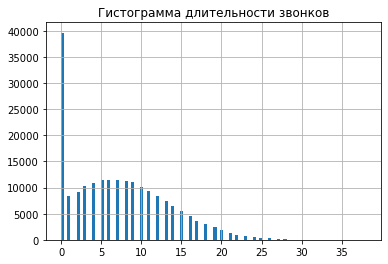

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [131]:
dataset_calls['duration'].hist(bins=100).set_title('Гистограмма длительности звонков')
plt.show()
dataset_calls['duration'].describe()

Судя по медиане длительности звонков большинство пользователи Мегалайна любят поговорить примерно 6 минут. Стоит так же обратить внимание на звонки с длительностью 0 минут, мы про них уже говорил, их более 40 000 ед. Предлагаю с ними ничего не делать, считаю что специалистам Мегалайна надо просмотреть эти звонки более детально, чтобы узнать почему так просиходит: возможно пропадала связь во время вызова ( это уже вопрос к техническим специалистам и зоной покрытия, можно узнать слабые места покрытия), возможно абонет, которому звонили, был занят и звонок сбросился автоматически сразу ( тут мы уже ничего не поделаем).

Посчитаем количество смс, отправленных каждым пользователем в каждый месяце:

In [132]:
pivot_dataset_messages_count=pd.pivot_table(dataset_messages,index=['user_id'], columns='month',values='id', aggfunc='count')
display(pivot_dataset_messages_count.head(10))

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
1007,NaN,NaN,NaN,11.0,39.0,26.0,26.0,27.0,31.0,18.0,21.0,26.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0
1009,NaN,NaN,2.0,14.0,7.0,14.0,14.0,9.0,12.0,15.0,11.0,12.0
1011,NaN,NaN,4.0,7.0,13.0,13.0,13.0,15.0,10.0,17.0,12.0,6.0


In [133]:
pivot_dataset_messages_sum_month=pd.pivot_table(dataset_messages,index=['month'], values='id', aggfunc='count')
pivot_dataset_messages_sum_month.head(12)

,id
month,
1,924
2,1924
3,3648
4,5179
5,7298
6,8983
7,11320
8,13088
9,14759


Посчитаем сколько раз пользователи выходили в интернет ( это скорее всего не несет никакой информационной нагрузки, так как пользователи могли постараться зайти в интеренет и пропадала связь например или сессия начиналась и прерывалась - потому что телефон сел, варинатов много я думаю):

In [134]:
pivot_dataset_internet_count=pd.pivot_table(dataset_internet,index=['user_id'], columns='month',values='mb_used', aggfunc='count')
display(pivot_dataset_internet_count.head(10))

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,5.0,49.0,29.0,29.0,27.0,27.0,24.0,21.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,41.0
1002,NaN,NaN,NaN,NaN,NaN,34.0,58.0,60.0,56.0,44.0,55.0,62.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,22.0,25.0,21.0,21.0
1004,NaN,NaN,NaN,NaN,24.0,35.0,35.0,52.0,37.0,41.0,36.0,40.0
1005,6.0,24.0,28.0,30.0,25.0,28.0,21.0,23.0,24.0,21.0,30.0,29.0
1006,NaN,8.0,52.0,42.0,46.0,45.0,58.0,53.0,50.0,61.0,37.0,55.0
1007,NaN,NaN,NaN,21.0,60.0,44.0,61.0,57.0,45.0,46.0,52.0,52.0
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0


Посчитаем сколько интернет-трафика потратили пользователи "Мегалайна" по месяцам:

In [135]:
pivot_dataset_internet_sum=pd.pivot_table(dataset_internet,index=['user_id'], columns='month',values='mb_used', aggfunc='sum')
display(pivot_dataset_internet_sum.head(10))

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04
1005,2727.97,7383.93,11104.25,9351.72,7865.53,9863.19,7694.56,7543.63,7016.46,7800.93,12666.95,8668.19
1006,NaN,1392.15,17287.93,13936.70,12965.41,12371.66,19977.60,19303.71,15521.53,19696.60,13259.41,18476.11
1007,NaN,NaN,NaN,8022.76,17687.27,13654.52,15656.66,20700.40,12613.05,14427.33,16369.61,12494.07
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13217.14


Взглянем как изменялся интрент-трафик по месяцам в целом:

In [136]:
pivot_dataset_internet_sum_month=pd.pivot_table(dataset_internet,index=['month'], values='mb_used', aggfunc='sum')
display(pivot_dataset_internet_sum_month.head(12))

,mb_used
month,
1,407732.53
2,955251.65
3,1811835.61
4,2433311.62
5,3525862.24
6,4180017.17
7,5029478.75
8,5998157.07
9,6447422.36


Посмотрим, сколько в среднем в мегабайтах длится инетрент сессия у пользователей:

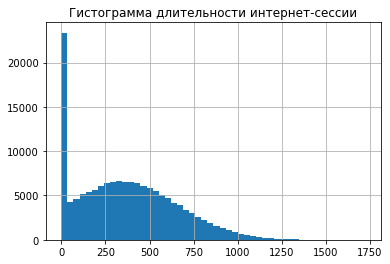

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [137]:
dataset_internet['mb_used'].hist(bins=50).set_title('Гистограмма длительности интернет-сессии')
plt.show()
dataset_internet['mb_used'].describe()

Получается, что средняя продолжительность интернет-сессии 370 Мегабайт. Присутсвуют так же много околонулевых сессий ( более 25 тыс.), явно какие то проблемы с соединением, на что так же стоит обратить внимание техническим специалистам Мегалайн и узнать почему так происходит ( возможно это программы быстренько обновлялись в фоновом режиме: например почтовый клиент проверял нет ли новых писем. Но в любом случае надо это проверить).

У нас по всем трем позициям: смс, звонки и интернет трафик наблюдается странная закономерность - каждый месяц их количество лавинообразно увеличивается. Давайте проверим подключения к Мегалайну по месяцам.

In [138]:
dataset_users['reg_date'] = pd.to_datetime(dataset_users['reg_date'], format='%Y-%m-%d')

In [139]:
dataset_users['month'] = dataset_users['reg_date'].dt.month

In [140]:
pivot_dataset_users_count_month=pd.pivot_table(dataset_users,index=['month'], values='user_id', aggfunc='count')
display(pivot_dataset_users_count_month.head(12))

,user_id
month,
1,43
2,39
3,32
4,53
5,41
6,40
7,44
8,50
9,35


Вот и ответ на вопрос: лавиообразный рост показателей повлекло увеличение клиентской базы Мегалайна в течении всего года. Всего у нас в выборке 500 уникальных пользователей, в сумме за 12 месяцев подключилось 500 пользователей, то есть логично, что какдый месяц сумма израсходованных минут, отправленных смс и интернет трафика увеличивалось.

 
#### Вывод
* Обычно пользователи говорят по 6 минут за звонок. Но есть звонки в 0 минут, которым надо уделить внимание: либо абонент был занят либо были неполадки с сетью - это должно помочь понять что с зоной покрытия.

* 370 мегабайт - средняя интернет-сессия пользователей Мегалайн (наверное кто-то смотрит инстраграмм когда едет на работу или просматривает паблики в контакте), но есть и более длительные сессии - наверное это любители ютуба)

* Мы заметили, что с каждым месяцем объем услуг, потребляемых пользователями Мегалайн, увеличивался. Мы выяснили, что все 500 пользователей постепенно подключались к Мегалайну. Предполагаю несколько возможных вариантов почему это происходит:
  
  * у нас в выборке только поьзователи, которые присоединялись к Мегалайну постепенно в 2018 г. ( но у Мегалайна есть и другие клиенты)
  * тарифы Смарт и Ультра были запущены только в 2018 г.
  * была крупная рекламная кампания по данным тарифам и пошел поток новых пользователей.
  * Мегалайн начал свою деятельность только в 2018 г.



### Добавление результатов расчета в таблицу для анализа



Объеденим наши датафреймы звонков, смс и интернет трафика в единое целое с указанием тарифа по каждому пользователю:

In [141]:
all_calls = dataset_calls.groupby(['user_id','month','tariff'])['duration'].agg(['count', 'sum'])
all_messages = dataset_messages.groupby(['user_id', 'month','tariff'])['id'].count()
all_internet = dataset_internet.groupby(['user_id', 'month','tariff']).sum()['mb_used']

In [142]:
dataset = pd.concat([all_calls, all_messages, all_internet], axis=1)
dataset = dataset.reset_index()
dataset=dataset.rename(columns={'id':'sms'}) # переименую столбец, чтобы было понятно, что там количество смс (а то надпись id не совсем понятна)
def price_id_def(row): #добавим сразу столбец с абонентской платой за тариф
    price_group = row['tariff']
    if price_group == "ultra":
            return '1950'
    if price_group == "smart":
            return '550'
#dataset['price']=dataset.apply(price_id_def, axis=1).astype('int')
#dataset['count']=dataset['count'].replace(np.nan, 0).astype('int')
#dataset['sum']=dataset['sum'].replace(np.nan, 0).astype('int')
#dataset['sms']=dataset['sms'].replace(np.nan, 0).astype('int')
#dataset['mb_used']=dataset['mb_used'].replace(np.nan, 0).apply(np.ceil)
dataset.head(12)

,user_id,month,tariff,count,sum,sms,mb_used
0,1000,5,ultra,22.0,159.0,22.0,2253.49
1,1000,6,ultra,43.0,172.0,60.0,23233.77
2,1000,7,ultra,47.0,340.0,75.0,14003.64
3,1000,8,ultra,52.0,408.0,81.0,14055.93
4,1000,9,ultra,58.0,466.0,57.0,14568.91
5,1000,10,ultra,57.0,350.0,73.0,14702.49
6,1000,11,ultra,43.0,338.0,58.0,14756.47
7,1000,12,ultra,46.0,333.0,70.0,9817.61
8,1001,11,smart,59.0,430.0,NaN,18429.34
9,1001,12,smart,63.0,414.0,NaN,14036.66


In [143]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3214 non-null   int64  
 1   month    3214 non-null   int64  
 2   tariff   3214 non-null   object 
 3   count    3174 non-null   float64
 4   sum      3174 non-null   float64
 5   sms      2717 non-null   float64
 6   mb_used  3203 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 175.9+ KB


In [144]:
dataset.isna().sum()

user_id      0
month        0
tariff       0
count       40
sum         40
sms        497
mb_used     11
dtype: int64

В столбцах смс, звонки и их количество, интернет-трафик есть пропуски - но я так предполагаю, что в это не совсем пропуски - в эти месяцы пользователи не пользовались данными услугами, поэтому и пропуски ( например я практически никогда не отправляю смс, но иногда это надо сделать - и судя по данным я не один такой:-))

Но проверим еще один момент - не у одних и тех же абонентов пропуски:


In [145]:
count_proverka=dataset['count']
sms_proverka=dataset['sms']
mb_used_proverka=dataset['mb_used']
proverka=0 # в переменную будем добавлять по единице, если пропуск в столбцах совпадают пропуски 
for index in range(len(count_proverka)):
    if count_proverka[index] == sms_proverka[index] == mb_used_proverka[index]:
        proverka+=1
print(proverka)

0


Итак получается, что значения не совпадают по одному абоненту, значит все пользуются различными услугами.

Посмотрим на распределение пользователей по городам:

Text(0.5, 1.0, 'Гистограмма распределения пользователей по городам')

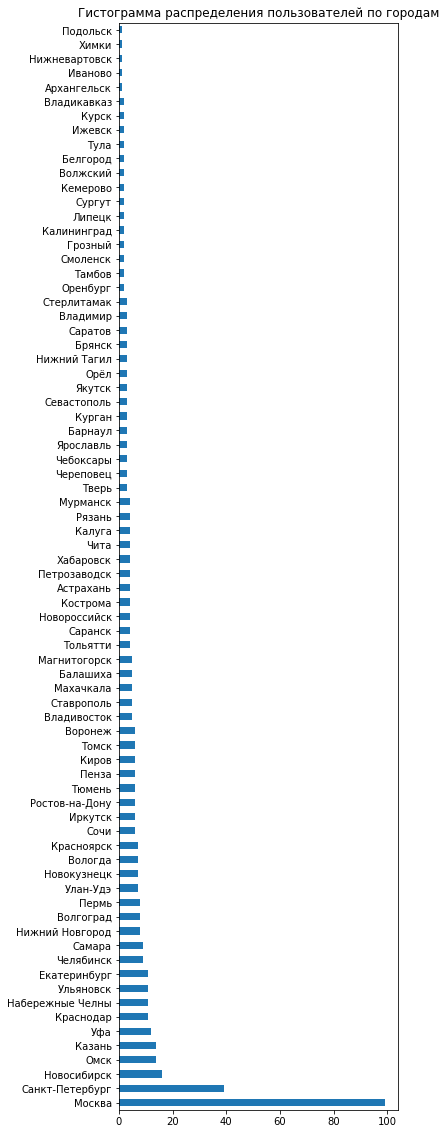

In [146]:
dataset_users['city'].value_counts().plot(kind='barh', figsize=(5,20)).set_title('Гистограмма распределения пользователей по городам')

Онсновна масса пользователей Мегалайна - это жители городов Москва и Санкт-Петербург ( мой Воронеж где то в середине).

Посмотрим на популярный тыриф Мегалайна:

Text(0.5, 1.0, 'Гистограмма распределения пользователей по тарифам')

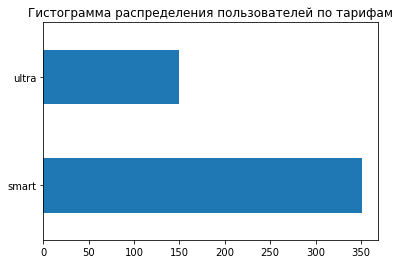

In [147]:
dataset_users['tariff'].value_counts().plot(kind='barh').set_title('Гистограмма распределения пользователей по тарифам')

Почти 70 % пользователей из выборки выбрали тариф smart.

Посчитаем перерасход пользователей по минутам, смс и ГБ и узнаем сколько каждый пользователь платит выше абонентской платы:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
user_id    3214 non-null int64
month      3214 non-null int64
tariff     3214 non-null object
count      3174 non-null float64
sum        3174 non-null float64
sms        2717 non-null float64
mb_used    3203 non-null float64
price      3214 non-null int64

In [148]:
def calls_over(row):
    if row['tariff'] == 'smart':
        result = row['sum'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['sum'] - 3000
        return np.where(result > 0, result, 0)
    
    
def sms_over(row):
    if row['tariff'] == 'smart':
        result = row['sms'] - 50
        return np.where(result > 0, result, 0)
    else:
        result =  row['sms'] - 1000
        return np.where(result > 0, result, 0)
    

def internet_over(row):
    if row['tariff'] == 'smart':
        result = row['mb_used'] - 15 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['mb_used'] - 30 * 1024
        return np.where(result > 0, result, 0)
    
    
def month_over(row):
    sum_over_month = 0
    if row['tariff'] == 'smart':
        sum_over_month += row['sum_over'] * 3
        sum_over_month += row['smska_over'] * 3
        sum_over_month += np.ceil(row['mb_over']/1024) * 200
        return sum_over_month
    
    else:
        sum_over_month += row['sum_over'] * 1
        sum_over_month += row['smska_over'] * 1
        sum_over_month += np.ceil(row['mb_over']/1024) * 150
        return sum_over_month

In [149]:
dataset['sum_over'] = dataset.apply(calls_over, axis=1)
dataset['smska_over'] = dataset.apply(sms_over, axis=1)
dataset['mb_over'] = dataset.apply(internet_over, axis=1)
dataset['over_price'] = dataset.apply(month_over, axis=1).astype('int')
dataset.sample(20)

,user_id,month,tariff,count,sum,sms,mb_used,sum_over,smska_over,mb_over,over_price
2217,1352,6,ultra,110.0,805.0,9.0,20790.91,0.0,0.0,0.0,0
590,1093,11,smart,119.0,843.0,76.0,18735.08,343.0,26.0,3375.079999999998,1907
107,1014,12,smart,32.0,175.0,53.0,25420.71,0.0,3.0,10060.71,2009
1804,1284,11,smart,60.0,407.0,42.0,19499.52,0.0,0.0,4139.52,1000
889,1142,10,smart,60.0,457.0,44.0,20860.79,0.0,0.0,5500.790000000001,1200
2757,1429,3,smart,47.0,357.0,NaN,23721.07,0.0,0.0,8361.07,1800
3204,1497,11,smart,64.0,371.0,14.0,14156.08,0.0,0.0,0.0,0
2908,1454,7,smart,77.0,520.0,28.0,15346.11,20.0,0.0,0.0,60
2525,1394,7,smart,63.0,455.0,6.0,7104.38,0.0,0.0,0.0,0
137,1019,6,ultra,52.0,386.0,25.0,22201.17,0.0,0.0,0.0,0


Добавим столбец о наличии переплаты:

In [150]:
def over_price_id_def(row):
    over_price = row['over_price']
    if over_price == 0:
            return '0'
    if over_price > 0:
            return '1'
dataset['over_price_id']=dataset.apply(over_price_id_def, axis=1)

def over_price_def(row):
    over_price = row['over_price']
    if over_price == 0:
            return 'нет переплаты'
    if over_price > 0:
            return 'есть переплата'
dataset['over_price_name']=dataset.apply(over_price_def, axis=1)
dataset.sample(20)


,user_id,month,tariff,count,sum,sms,mb_used,sum_over,smska_over,mb_over,over_price,over_price_id,over_price_name
2724,1424,11,ultra,6.0,16.0,83.0,17145.74,0.0,0.0,0.0,0,0,нет переплаты
2764,1429,10,smart,39.0,261.0,NaN,19998.68,0.0,0.0,4638.68,1000,1,есть переплата
1230,1190,12,smart,66.0,445.0,20.0,12049.42,0.0,0.0,0.0,0,0,нет переплаты
2991,1466,4,ultra,73.0,453.0,NaN,21436.37,0.0,0.0,0.0,0,0,нет переплаты
229,1035,11,smart,44.0,303.0,51.0,11816.84,0.0,1.0,0.0,3,1,есть переплата
1764,1279,10,smart,73.0,516.0,1.0,13779.41,16.0,0.0,0.0,48,1,есть переплата
2438,1382,6,ultra,98.0,681.0,74.0,7844.43,0.0,0.0,0.0,0,0,нет переплаты
663,1104,9,ultra,55.0,451.0,85.0,15961.95,0.0,0.0,0.0,0,0,нет переплаты
2534,1395,4,smart,81.0,657.0,37.0,18603.33,157.0,0.0,3243.3300000000017,1271,1,есть переплата
84,1011,9,smart,65.0,472.0,10.0,21739.69,0.0,0.0,6379.689999999999,1400,1,есть переплата


In [151]:
pivot_dataset_over=pd.pivot_table(dataset,index=['tariff'], columns='over_price_name', values='over_price_id', aggfunc='count')
pivot_dataset_over['percent'] = pivot_dataset_over['есть переплата'] / (pivot_dataset_over['есть переплата'] 
                                + pivot_dataset_over['нет переплаты']) * 100
display(pivot_dataset_over)

over_price_name,есть переплата,нет переплаты,percent
tariff,,,
smart,1662,567,74.562584
ultra,134,851,13.604061


Получается, что 73 % пользователям тарифа smart не хватает включенных в пакет услуг и они всегда заказывают доп услуги. А вот пользователи тарифом ultra переплачивают только в 13% случаев.

Посчитаем помесяную выручку с каждого пользователя:

In [152]:
dataset['proceeds'] = dataset['sum_over'] + dataset['over_price']
dataset.loc[dataset['user_id'] == 1005].head(10)

,user_id,month,tariff,count,sum,sms,mb_used,sum_over,smska_over,mb_over,over_price,over_price_id,over_price_name,proceeds
30,1005,1,smart,15.0,95.0,7.0,2727.97,0.0,0.0,0.0,0,0,нет переплаты,0.0
31,1005,2,smart,69.0,456.0,38.0,7383.93,0.0,0.0,0.0,0,0,нет переплаты,0.0
32,1005,3,smart,77.0,606.0,56.0,11104.25,106.0,6.0,0.0,336,1,есть переплата,442.0
33,1005,4,smart,101.0,712.0,41.0,9351.72,212.0,0.0,0.0,636,1,есть переплата,848.0
34,1005,5,smart,73.0,595.0,42.0,7865.53,95.0,0.0,0.0,285,1,есть переплата,380.0
35,1005,6,smart,80.0,612.0,47.0,9863.19,112.0,0.0,0.0,336,1,есть переплата,448.0
36,1005,7,smart,77.0,569.0,56.0,7694.56,69.0,6.0,0.0,225,1,есть переплата,294.0
37,1005,8,smart,71.0,619.0,64.0,7543.63,119.0,14.0,0.0,399,1,есть переплата,518.0
38,1005,9,smart,66.0,479.0,52.0,7016.46,0.0,2.0,0.0,6,1,есть переплата,6.0
39,1005,10,smart,100.0,723.0,44.0,7800.93,223.0,0.0,0.0,669,1,есть переплата,892.0


Посмотрим, сколько в среднем переплачиваю пользователи тарифов:

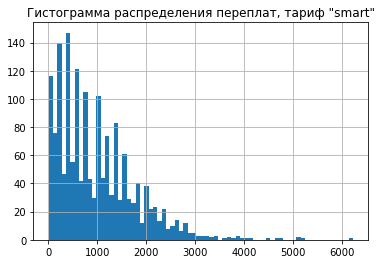

count    1662.000000
mean      992.419374
std       804.823706
min         3.000000
25%       400.000000
50%       800.000000
75%      1403.250000
max      6220.000000
Name: over_price, dtype: float64

In [153]:
dataset_smart=dataset[(dataset['tariff'] == "smart") &
                     (dataset['over_price'] > 0)]
dataset_smart['over_price'].hist(bins=70).set_title('Гистограмма распределения переплат, тариф "smart"')
plt.show()
dataset_smart['over_price'].describe()

Text(0.5, 1.0, 'Гистограмма распределения переплат, тариф "smart"')

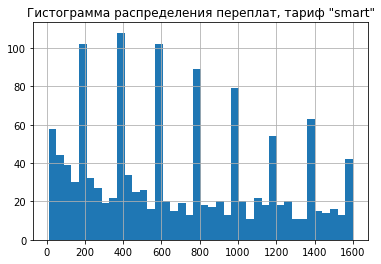

In [154]:
dataset_smart['over_price'].hist(bins=40, range=(10,1600)).set_title('Гистограмма распределения переплат, тариф "smart"')

Что мы видим: основные переплаты составляю в сумме до 1600 руб. Большинство пользователей Мегалайна (которые переплачивают) по тарифу "smart" переплачивают в среднем переплачивают 800 руб. Если посмотреть на второй график, то можно заметить, что скачки переплат происходят каждые 200 руб. - это сумма доплаты за 1 гб интернета, значит в соновном не хвататет интернета пользователям.

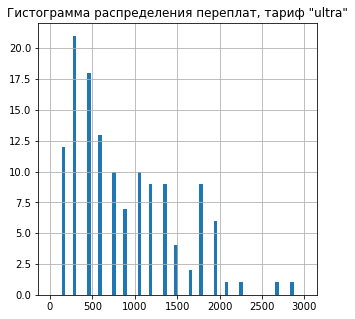

count     134.000000
mean      883.208955
std       606.634498
min       150.000000
25%       450.000000
50%       750.000000
75%      1312.500000
max      2850.000000
Name: over_price, dtype: float64

In [155]:
dataset_ultra=dataset[(dataset['tariff'] == "ultra") &
                     (dataset['over_price'] > 0)]
dataset_ultra['over_price'].hist(bins=70, range=(10,3000),figsize=(5,5)).set_title('Гистограмма распределения переплат, тариф "ultra"')
plt.show()
dataset_ultra['over_price'].describe()

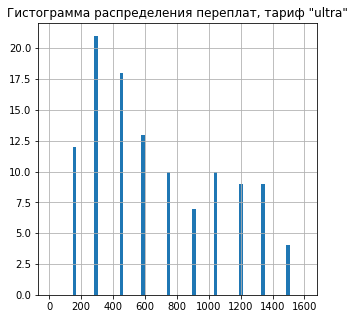

In [156]:
dataset_ultra['over_price'].hist(bins=70, range=(10,1600),figsize=(5,5)).set_title('Гистограмма распределения переплат, тариф "ultra"')
plt.show()

А вот в тарифе "ultra" пользователи заказывают только дополнительный интернет.

#### Вывод
* Сгрупировали каждого пользователя по месяцам ( с учетом их использования минут, интернет-трафика и смс)
* Посчитали сколько в среднем длится зовнок, интерент сессия и чем равно среднее значение смс на каждом из тарифов.
* Добавили столбец с перерасходом услуг и суммой доплаты
* Создали столбец "полной" выручки с абонета ( с учетом переплаты)
* Сгруппировали пользователй по регионам
* 73 % пользователям тарифа smart не хватает включенных в пакет услуг и они всегда заказывают доп услуги. А вот пользователи тарифом ultra переплачивают только в 13% случаев: пользовател тарифа smart переплачивают в основном за минуты и гб, а пользователи тарифа ultra в основном только за интернет


### Исследовательский анализ данных 

Посмотрим сколько в среднем пользователи тарифов тратят смс, интернета и звонков в месяц:

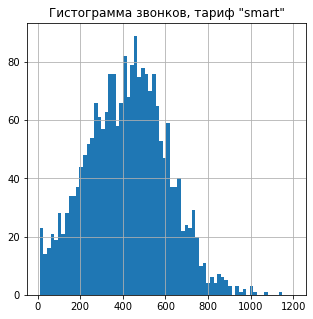

count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: sum, dtype: float64

In [157]:
dataset_smart_mean_calls=dataset[(dataset['tariff'] == "smart")]
dataset_smart_mean_calls['sum'].hist(bins=70, range=(10,1200),figsize=(5,5)).set_title('Гистограмма звонков, тариф "smart"')
plt.show()
dataset_smart_mean_calls['sum'].describe()

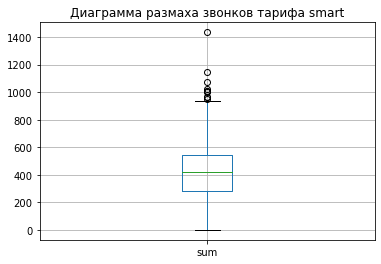

In [158]:
dataset_smart_mean_calls.boxplot(['sum']).set_title('Диаграмма размаха звонков тарифа smart')
plt.show()  

В среднем получается, что пользователи тарифа smart тратят в месяц 400 минут ( при лимите в 500 минут), то есть пользователи выбирают минуты практически 80% заявленных минут тарифа. Если посмотреть в целом, то пользователи в целом говорят от 267 до 515 минут на данном тарифе.

У нас есть выбросы в данных ( это нулевые звонки и звонки с слишком длинными разговорами). Давайте почистим выборку и посмотрим измениться ли ситуация:

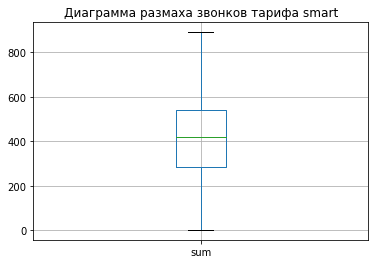

In [159]:
dataset_smart_mean_calls = dataset_smart_mean_calls[(dataset_smart_mean_calls['sum'] <900) & (dataset_smart_mean_calls['sum'] > 0)]
dataset_smart_mean_calls.boxplot(['sum']).set_title('Диаграмма размаха звонков тарифа smart')
plt.show() 

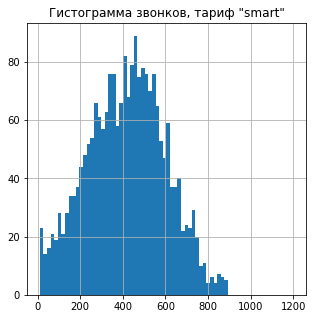

count    2205.000000
mean      415.192744
std       182.628113
min         2.000000
25%       283.000000
50%       421.000000
75%       543.000000
max       891.000000
Name: sum, dtype: float64

In [160]:
dataset_smart_mean_calls['sum'].hist(bins=70, range=(10,1200),figsize=(5,5)).set_title('Гистограмма звонков, тариф "smart"')
plt.show()
dataset_smart_mean_calls['sum'].describe()

In [161]:
variance_calls = np.var(dataset_smart_mean_calls['sum'], ddof=1)
print(variance_calls) 

33353.027715018216


Ситуация кардинально не поменялась, результаты те же: средний расход минут в районе 400 минут, в целом тратят от 268 до 513 минут.

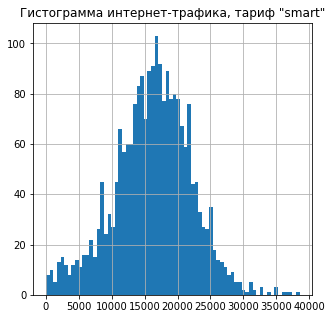

count     2228.000000
mean     16215.661849
std       5861.736234
min          0.000000
25%      12649.272500
50%      16507.740000
75%      20043.792500
max      38552.450000
Name: mb_used, dtype: float64

In [162]:
dataset_smart_mean_internet=dataset[(dataset['tariff'] == "smart")]
dataset_smart_mean_internet['mb_used'].hist(bins=70,figsize=(5,5)).set_title('Гистограмма интернет-трафика, тариф "smart"')
plt.show()
dataset_smart_mean_internet['mb_used'].describe()

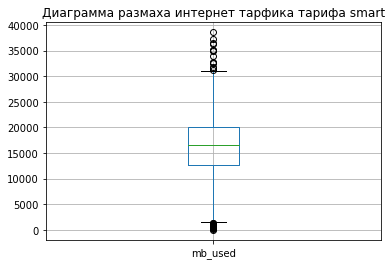

In [163]:
dataset_smart_mean_internet.boxplot(['mb_used']).set_title('Диаграмма размаха интернет тарфика тарифа smart')
plt.show() 

В целом пользователи тратят в месяц от 13 до 20 гб в месяц. Среднестатистический пользователь тратит примерно 16 гб в месяц, при лимите в 15 ГБ. Выше мы предположили, что пользователи в основном переплачивают за интернет и вот этому подтверждение ( если в минуты пользователи в оснвном укладываются, то в интернет трафик нет).

Давайте удалим выбросы и посмотрим изменится ли ситуация:

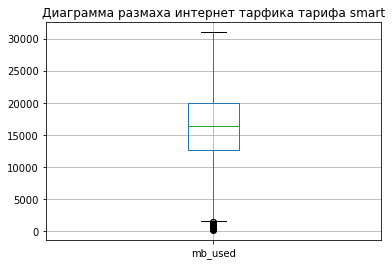

In [164]:
dataset_smart_mean_internet = dataset_smart_mean_internet[(dataset_smart_mean_internet['mb_used'] <31000) & (dataset_smart_mean_internet['mb_used'] > 0)]
dataset_smart_mean_internet.boxplot(['mb_used']).set_title('Диаграмма размаха интернет тарфика тарифа smart')
plt.show() 

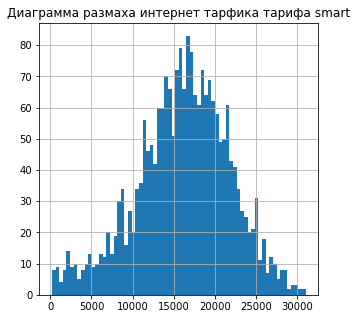

count     2211.000000
mean     16095.183198
std       5673.868770
min        201.070000
25%      12621.185000
50%      16461.940000
75%      19975.795000
max      30981.620000
Name: mb_used, dtype: float64

In [165]:
dataset_smart_mean_internet['mb_used'].hist(bins=70,figsize=(5,5)).set_title('Диаграмма размаха интернет тарфика тарифа smart')
plt.show()
dataset_smart_mean_internet['mb_used'].describe()

In [166]:
variance_internet = np.var(dataset_smart_mean_internet['mb_used'], ddof=1)
print(variance_internet) 

32192786.813710365


Ситуация в целом не поменялась. Все так же можно заключить, что пользователям не хватате интернета на тарифе smart.

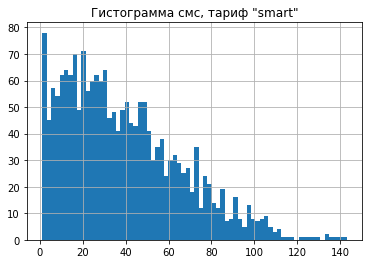

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: sms, dtype: float64

In [167]:
dataset_smart_mean_sms=dataset[(dataset['tariff'] == "smart")]
dataset_smart_mean_sms['sms'].hist(bins=70).set_title('Гистограмма смс, тариф "smart"')
plt.show()
dataset_smart_mean_sms['sms'].describe()

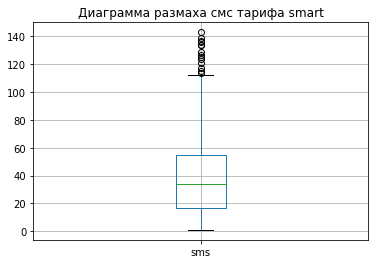

In [168]:
dataset_smart_mean_sms.boxplot(['sms']).set_title('Диаграмма размаха смс тарифа smart')
plt.show()  

В основном пользователям хвататет смсок в данном тарифе. В целом люди тратят от 10 до 51 смски в месяц, что практически укладывается в лимит, переплата за смс практически нулевая. Уберем выбросы ( те которые тратят больше 100 смс в месяц - это какие то очень активные люди)).

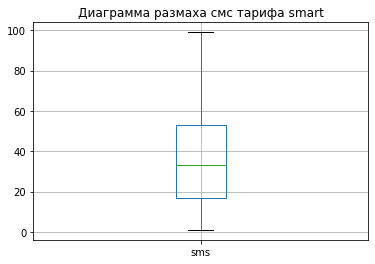

count    1872.000000
mean       36.763355
std        24.217350
min         1.000000
25%        17.000000
50%        33.000000
75%        53.000000
max        99.000000
Name: sms, dtype: float64

In [169]:
dataset_smart_mean_sms = dataset_smart_mean_sms[(dataset_smart_mean_sms['sms'] <100)& (dataset_smart_mean_sms['sms'] > 0)]
dataset_smart_mean_sms.boxplot(['sms']).set_title('Диаграмма размаха смс тарифа smart')
plt.show() 
dataset_smart_mean_sms['sms'].describe()

Text(0.5, 1.0, 'Гистограмма смс, тариф "smart"')

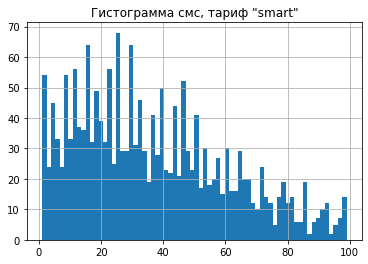

In [170]:
dataset_smart_mean_sms['sms'].hist(bins=70).set_title('Гистограмма смс, тариф "smart"')

In [171]:
variance_sms = np.var(dataset_smart_mean_sms['sms'], ddof=1)
print(variance_sms) 
standard_sms=np.std(dataset_smart_mean_sms['sms'], ddof=1) # проверим совпадает ли значение с расчетом describe:-)
print(standard_sms)

586.4800460355309
24.217350103500813


После удаления выбросов получается, что практически всем пользователям данного тарифа хватате смс в пакете.

В целом по тарифу smart можно сказать следующее: 
* гигабайтов в основном не хвататет пользователям данного тарифа, они часто заказывают дополнительные пакет
* минут для большинства пользователей хватате
* смс в пакете хвататет практически всем пользователям, оплачивают сверхлимита единицы

Проведеме аналогичные манипуляции для тарифа ultra

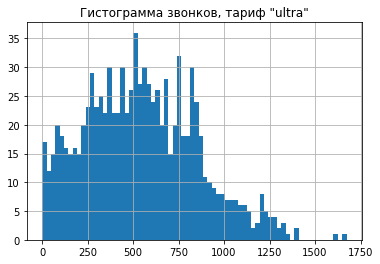

count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: sum, dtype: float64

In [172]:
dataset_ultra_mean_calls=dataset[(dataset['tariff'] == "ultra")]
dataset_ultra_mean_calls['sum'].hist(bins=70).set_title('Гистограмма звонков, тариф "ultra"')
plt.show()
dataset_ultra_mean_calls['sum'].describe()

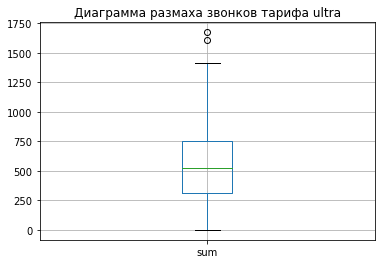

In [173]:
dataset_ultra_mean_calls.boxplot(['sum']).set_title('Диаграмма размаха звонков тарифа ultra')
plt.show()  

Судя по данным пользователей тарифа ultra,которые разговаривают по телефону в несколько раз меньше, чем пользователей тарифа smart ( почти в два раза). В осномно пользователи тратят от 270 до 710 минут в месяц при лимите в 3000. В среднем тратят 500 минут.

Почистим выборку от выбросом и посмотрим изменится, что-нибудь или нет.

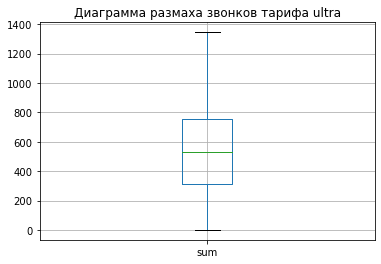

In [174]:
dataset_ultra_mean_calls = dataset_ultra_mean_calls[(dataset_ultra_mean_calls['sum'] <1400) & (dataset_ultra_mean_calls['sum'] > 0)]
dataset_ultra_mean_calls.boxplot(['sum']).set_title('Диаграмма размаха звонков тарифа ultra')
plt.show() 

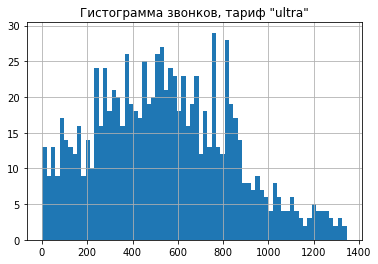

count     943.000000
mean      543.617179
std       299.359005
min         1.000000
25%       311.000000
50%       528.000000
75%       756.000000
max      1345.000000
Name: sum, dtype: float64

In [175]:
dataset_ultra_mean_calls['sum'].hist(bins=70).set_title('Гистограмма звонков, тариф "ultra"')
plt.show()
dataset_ultra_mean_calls['sum'].describe()

In [176]:
variance_calls_ultra = np.var(dataset_ultra_mean_calls['sum'], ddof=1)
print(variance_calls_ultra) 

89615.81401454008


Сильно данные не поменялись, немного увеличелось среднее( до 515 минут), стандартное отклонение уменьшилось до 285.

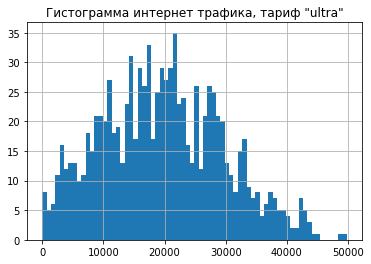

count      975.000000
mean     19668.485262
std       9943.050284
min          0.000000
25%      12008.305000
50%      19394.290000
75%      26896.550000
max      49745.690000
Name: mb_used, dtype: float64

In [177]:
dataset_ultra_mean_internet=dataset[(dataset['tariff'] == "ultra")]
dataset_ultra_mean_internet['mb_used'].hist(bins=70).set_title('Гистограмма интернет трафика, тариф "ultra"')
plt.show()
dataset_ultra_mean_internet['mb_used'].describe()

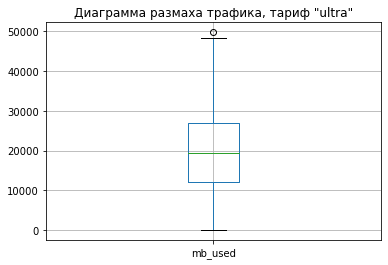

In [178]:
dataset_ultra_mean_internet.boxplot(['mb_used']).set_title('Диаграмма размаха трафика, тариф "ultra"')
plt.show()  

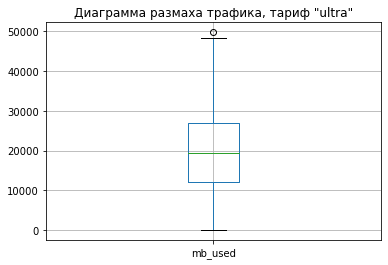

In [179]:
dataset_ultra_mean_internet = dataset_ultra_mean_calls[(dataset_ultra_mean_internet['sum'] <45000) & (dataset_ultra_mean_internet['sum'] > 0)]
dataset_ultra_mean_internet.boxplot(['mb_used']).set_title('Диаграмма размаха трафика, тариф "ultra"')
plt.show() 

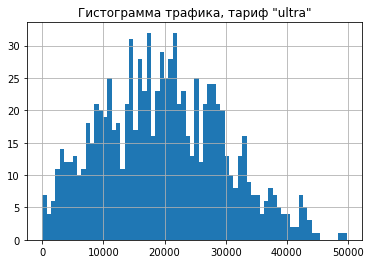

count      933.000000
mean     19720.511726
std       9967.710138
min          0.000000
25%      11966.720000
50%      19428.210000
75%      26951.160000
max      49745.690000
Name: mb_used, dtype: float64

In [180]:
dataset_ultra_mean_internet['mb_used'].hist(bins=70).set_title('Гистограмма трафика, тариф "ultra"')
plt.show()
dataset_ultra_mean_internet['mb_used'].describe()

In [181]:
variance_internet_ultra = np.var(dataset_ultra_mean_internet['mb_used'], ddof=1)
print(variance_internet_ultra) 

99355245.39820565


Абоненты тарифа ultra очень активно пользуются интернетом, в основном пользователи тратят от 11,7 гб до 26,8 гб. В среднем пользователи тратят 19,5 гб. В любом случае большинству пользователей тарифа ultra хватает интернета на тарифе.

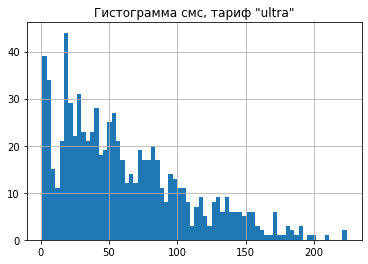

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: sms, dtype: float64

In [182]:
dataset_ultra_mean_sms=dataset[(dataset['tariff'] == "ultra")]
dataset_ultra_mean_sms['sms'].hist(bins=70).set_title('Гистограмма смс, тариф "ultra"')
plt.show()
dataset_ultra_mean_sms['sms'].describe()

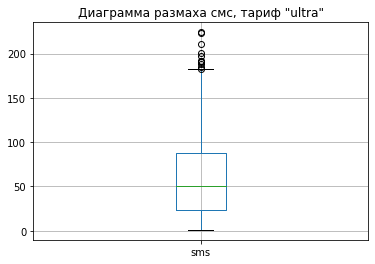

In [183]:
dataset_ultra_mean_sms.boxplot(['sms']).set_title('Диаграмма размаха смс, тариф "ultra"')
plt.show()  

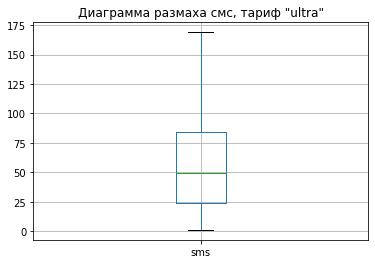

In [184]:
dataset_ultra_mean_sms = dataset_ultra_mean_sms[(dataset_ultra_mean_sms['sms'] <170) & (dataset_ultra_mean_sms['sms'] > 0)]
dataset_ultra_mean_sms.boxplot(['sms']).set_title('Диаграмма размаха смс, тариф "ultra"')
plt.show() 

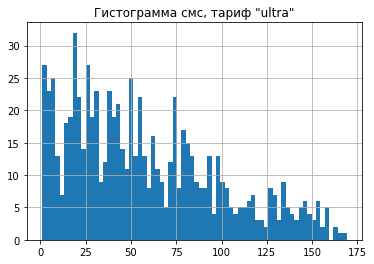

count    773.000000
mean      57.586028
std       41.235447
min        1.000000
25%       24.000000
50%       49.000000
75%       84.000000
max      169.000000
Name: sms, dtype: float64

In [185]:
dataset_ultra_mean_sms['sms'].hist(bins=70).set_title('Гистограмма смс, тариф "ultra"')
plt.show()
dataset_ultra_mean_sms['sms'].describe()

In [186]:
variance_internet_sms = np.var(dataset_ultra_mean_sms['sms'], ddof=1)
print(variance_internet_sms) 

1700.3620843359759


В среднем пользователи тарифа ultra отправляют до 58 сообщений  в месяц, в общем от 24 до 85 сообщений. Этого хватате ( пакет включает 1000 сообщени). Если сравнивать с пользователями тарифа smart - то можно сказать, что пользователи тарифа smart чаще пользуются чаще этой услугой ( но учтем что и пользователей тарифа смарт больше).

Посчитаем выручку по тарифам:

In [187]:
pivot_dataset_all_revenue=pd.pivot_table(dataset,index=['tariff'],values='proceeds', aggfunc=['count', 'sum'])
pivot_dataset_all_revenue['revenue_on_one'] = pivot_dataset_all_revenue[( 'sum', 'proceeds')] / (pivot_dataset_all_revenue[('count', 'proceeds')]) 
pivot_dataset_all_revenue['revenue_on_one']=pivot_dataset_all_revenue['revenue_on_one'].astype('int')          
display(pivot_dataset_all_revenue)


,count,sum,revenue_on_one
,proceeds,proceeds,
tariff,,,
smart,2229,1742140.0,781
ultra,985,118350.0,120


Почти 58 % выручки из выбранный пользователей приносят обоненты тарифа smart. Средняя выручка на одного клиента выше у тарифа ultra, однако из-за большого количества пользователей тарифа smart они приносят большую часть выручки в этой выборке.

Посчитаем выручку по Москве и другим регионам.

In [188]:
dataset_region=dataset_users[['user_id','city']]
dataset=dataset.merge(dataset_region, on='user_id')
def region_id_def(row):
    region_group = row['city']
    if region_group == "Москва":
           return 'Москва'
    if region_group != "Москва":
            return 'Другой регион'
dataset['region']=dataset.apply(region_id_def, axis=1)

pivot_dataset_region_revenue=pd.pivot_table(dataset,index=['region'],values='proceeds', aggfunc=['count', 'sum'])
pivot_dataset_region_revenue['revenue_on_one'] = pivot_dataset_region_revenue[( 'sum', 'proceeds')] / (pivot_dataset_region_revenue[('count', 'proceeds')]) 
pivot_dataset_region_revenue['revenue_on_one']=pivot_dataset_region_revenue['revenue_on_one'].astype('int')          
display(pivot_dataset_region_revenue)

,count,sum,revenue_on_one
,proceeds,proceeds,
region,,,
Другой регион,2603,1551269.0,595
Москва,611,309221.0,506


Выручка с одного пользователя в Москве больше, правда совсем немного - всего на 25 рублей.


#### Вывод
* Пользователям тарифа ultra и smart практически всегдахватает минут, включенных в пакет
* 53 % выручки приходится на пользователей тарифа smart
* Пользователи тарифа Ultra активнее используют интерент, чем пользователи тарифа smart
* Пользователи тарифа Smart активнее пользуются минутами, чем пользователи тарифа Ultra


## Общий вывод

* Пользователи тарифа ultra полностью вписываются в пакет минут по тарифу. Пользователи тарифа smart примерно в 75% случаев вписываются в пакет звонков, остальным приходится платить сверх пакета.
* Пользователи тарифов ultra и smart активно пользуются интернет трафиком. Более 25 % пользователей тарифа smart используют дополнительные пакеты интернета, в тарифе ultra малое количество (примерно 13%) пользователей берут дополнительный пакет интернета.
* СМС-сообщений, заложенных в тариф, хватат практически всем пользователяс smart. В тарифе ultra всем пользователям хватает смс-сообщений из пакета.
* Средняя переплата по тарифу smart составляет 966 рублей, медиана 800 ( это достаточно много, учитывая что сам тариф стоит 550 рублей. Пользователи тарифа ultra в среднем переплачивают 800 рублей ( медиана 750).
* Выручка c одного пользователя в тарифе ultra больче в 1,6 раза чем с одного пользователя тарифа smart. Однако из-за того, что количество пользователей тарифа smart больше - этот тариф приносит 58 % всей выручки.
* Выручка с одного пользователя в Москве чуть больше, чем в регионах ( Санкт-Петербург нельзя конечно назвать регионом, но что ж сделаем так)

# Проверка гипотезы

### Проверим первую гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем гипотезы:
* Нулевая гипотеза(H0): средняя выручка пользователей тарифа smart не отличается от средней выручки пользователей тарифа ultra 
* Альтернативная гипотеза (Н1): средняя выручка пользователей тарифа smart отличается от средней выручки пользователей тарифа ultra

In [189]:
dataset_smart=dataset[(dataset['tariff'] == "smart")]
dataset_smart=dataset_smart['proceeds']
dataset_ultra=dataset[(dataset['tariff'] == "ultra")]
dataset_ultra=dataset_ultra['proceeds']
alpha = .05 
results = st.ttest_ind(
    dataset_smart, 
    dataset_ultra)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.268925011743705e-110
Отвергаем нулевую гипотезу


Альтернативная гипотеза подтвердилась: средняя выручка пользователей тарифа smart отличается от средней выручки пользователей тарифа ultra. Выше мы уже с мы уже это конечно узнали ( сводная таблица выше). Давайте еще раз вглянем как выглядят эти данные:

In [190]:
print('Средняя выручка пользователей тарифа smart:',dataset_smart.mean())
print('Средняя выручка пользователей тарифа ultra:',dataset_ultra.mean())

Средняя выручка пользователей тарифа smart: 781.5791834903545
Средняя выручка пользователей тарифа ultra: 120.15228426395939


### Проверим первую гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем гипотезы:
* Нулевая гипотеза(H0): средняя выручка пользователей Москвы не отличается от средней выручки пользователей в регионах 
* Альтернативная гипотеза (Н1): средняя выручка пользователей Москвы отличается от средней выручки пользователей в регионах 

In [191]:
dataset_moscow=dataset[(dataset['region'] == "Москва")]
dataset_moscow=dataset_moscow['proceeds']
dataset_another=dataset[(dataset['region'] == "Другой регион")]
dataset_another=dataset_another['proceeds']
alpha = .05
results = st.ttest_ind(
    dataset_moscow, 
    dataset_another)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.013046091452031344
Отвергаем нулевую гипотезу


Получается, что средняя выручка с пользоватля в Москве практически не отличается от средней выручки с пользователя в регионах.
Для нагалядности можно посмотреть:

In [192]:
print('Средняя выручка пользователей в Москве:',dataset_moscow.mean())
print('Средняя выручка пользователей в регионах:',dataset_another.mean())

Средняя выручка пользователей в Москве: 506.09001636661213
Средняя выручка пользователей в регионах: 595.9542835190165


# Общий вывод

1. Склоняюсь к двум выводам по поводу пользователям:
    * тарифы начали действовать только с января 2018 г. поэтому у нас в выборке все пользователи подключились за год
    * оператор Мегалайн начал работать только в январе 2018 г.
2. В среднем пользователи тарифа smart тратят:
    * 394 минут (лимит 500)
    * 16 гб (лимит 15 )
    * 33 смс(лимит 50)
3. В среднем пользователи тарифа ultra тратят:
    * 515 минут (лимит 3000)
    * 19.5 гб (лимит 30 )
    * 57 смс(лимит 1000)
4. Абоненты тарифа smart приносят большую часть выручки компании Мегалайн, не смотря на то что тариф меньше, они берут количеством так сказать.
5. Выручка с одного пользователя в Москве и других регионах практически не отличается, а вот разница в выручке с пользователя тарифа smart и ultra отличается практически 1,6 раза.   
6. Абоненты тарифы smart - наверное любимцы компании Мегалайн, так как они чаще всего переплачивают за услуги выше лимита (75% пользователей).
7. Если говорить с точки зрения "улучшения" жизни пользователей - то можно рассмотреть увеличении стоимости тарифа smart и увеличении минут и гб в пакете. Пользователи данного тарифа переплачивают за доп услуги до 966 руб ( пристоймотси тарифа 550!) или придумать третий, промежуточный тариф, на который я думаю перешли многие пользователи.